# Scale-free Network Analysis

## 1.1 Low variability (High overlap = 0.1)
aka Healthy

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dfhealthy = pd.read_csv("dcor_synthetic_diseased_0.1.csv", delimiter=",", index_col=0)
dfhealthy.head(5)

,Gene_1,Gene_2,Gene_3,Gene_4,Gene_5,Gene_6,Gene_7,Gene_8,Gene_9,Gene_10,...,Gene_291,Gene_292,Gene_293,Gene_294,Gene_295,Gene_296,Gene_297,Gene_298,Gene_299,Gene_300
Gene_1,1.000000,0.355691,0.350963,0.371213,0.444883,0.319025,0.304228,0.369889,0.347181,0.293654,...,0.289970,0.235602,0.247276,0.171351,0.214597,0.203915,0.256153,0.180557,0.199991,0.242261
Gene_2,0.355691,1.000000,0.423180,0.443235,0.363947,0.390917,0.327084,0.325808,0.483667,0.318608,...,0.219935,0.248843,0.264065,0.249395,0.246839,0.197893,0.295054,0.223417,0.295155,0.247540
Gene_3,0.350963,0.423180,1.000000,0.550012,0.425760,0.494423,0.508565,0.512743,0.384071,0.501970,...,0.232711,0.224941,0.280525,0.223654,0.241220,0.173351,0.334943,0.279007,0.196719,0.289294
Gene_4,0.371213,0.443235,0.550012,1.000000,0.508112,0.488324,0.448402,0.542121,0.362347,0.355879,...,0.228687,0.252275,0.190344,0.299131,0.191288,0.216512,0.372672,0.260384,0.253624,0.316194
Gene_5,0.444883,0.363947,0.425760,0.508112,1.000000,0.475778,0.518973,0.389194,0.458405,0.404011,...,0.199117,0.351831,0.282037,0.257776,0.239304,0.197978,0.357827,0.314660,0.307528,0.326410


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


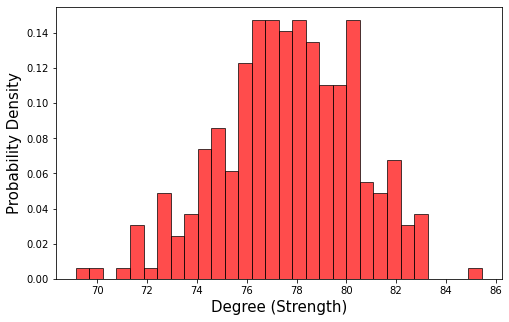

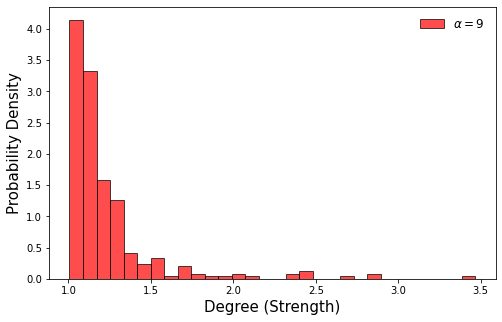

In [8]:
# Compute the degree (sum of weights) for each node
degree = np.sum(dfhealthy, axis=1)

# Plot the degree distribution in log-log scale
plt.figure(figsize=(8, 5))

# Compute the histogram (degree distribution)
counts, bin_edges, _ = plt.hist(degree, bins=30, density=True, facecolor='red', alpha=0.7, edgecolor='black') 

# Plot the degree distribution 
# Labels and title
plt.xlabel("Degree (Strength)", fontsize=15)
plt.ylabel("Probability Density", fontsize=15)
plt.legend(frameon=False, fontsize=12)
plt.savefig("healthy-adjPow1_0.1.png", dpi=600, bbox_inches='tight', facecolor="white")


# Compute the degree (sum of weights) for each node
power = 9
dfhealthy_pow = dfhealthy.pow(power)
# Compute the degree (sum of weights) for each node
degree = np.sum(dfhealthy_pow, axis=1)

# Plot the degree distribution in log-log scale
plt.figure(figsize=(8, 5))

# Compute the histogram (degree distribution)
counts1, bin_edges, _ = plt.hist(degree, bins=30, density=True, facecolor='red', alpha=0.7, edgecolor='black', label=fr"$\alpha = {power}$") 
# Plot the degree distribution 
# Labels and title
plt.xlabel("Degree (Strength)", fontsize=15)
plt.ylabel("Probability Density", fontsize=15)
# plt.title("Histogram")
plt.legend(frameon=False, fontsize=12)
plt.savefig(f"healthy-adjPow{power}_0.1.png", dpi=600, bbox_inches='tight', facecolor="white")
plt.show()

Estimated x_min: 1.01


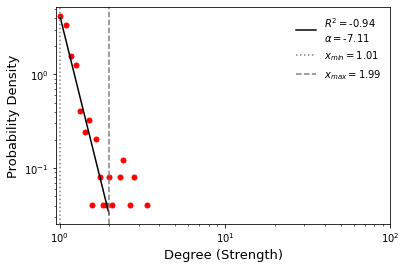

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from matplotlib.ticker import FuncFormatter

# Compute the histogram (degree distribution)
# counts, bin_edges = np.histogram(degree, bins=np.logspace(np.log10(min(degree[degree>0])), np.log10(max(degree)), 30), density=True)

power = 9
# Plot the degree distribution on a log-log scale
plt.plot(bin_edges[:-1], counts1, 'ro', markersize=5)

# Define the range for the linear fit (e.g., from the 5th to 20th percentile of degrees)
x_vals = bin_edges[:-1]
y_vals1 = counts1

# Choose indices that cover the linear region of the plot
linear_region_mask = (x_vals > 1.0) & (x_vals < 2)  # Example: Filter degrees between 10 and 100 (adjust as needed)

# Linear regression on the selected region
slope, intercept, r_value, p_value, std_err = linregress(np.log(x_vals[linear_region_mask] + 1e-6), np.log(y_vals1[linear_region_mask]+1e-6))

fit_y_vals = np.exp(intercept) * (x_vals[linear_region_mask]**slope)

# Plot the linear fit for visualization
plt.plot(x_vals[linear_region_mask], fit_y_vals, '-', color="black", label=r"$R^{2} = $"+f"{r_value:.2f}\n"+r"$\alpha = $"+f"{slope:.2f}")

# Mark the x_min (where the linear region starts)
x_min = min(x_vals[linear_region_mask])
x_max = max(x_vals[linear_region_mask])

plt.axvline(x=x_min, color='gray', linestyle='dotted', label=r"$x_{min} = $"+f"{x_min:.2f}")
plt.axvline(x=x_max, color='gray', linestyle='--', label=r"$x_{max} = $"+f"{x_max:.2f}")

# Display the plot
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree (Strength)', fontsize=13)
plt.ylabel('Probability Density', fontsize=13)

# Custom x-axis formatter to show ticks as 10^x
def format_func(value, tick_number):
    return r'$10^{%d}$' % int(np.log10(value))

# Set the x-axis ticks manually at 10^1, 10^2, 10^3, and 10^4
plt.xticks([10**i for i in range(0, 3)])

# Apply the custom formatter
plt.gca().get_xaxis().set_major_formatter(FuncFormatter(format_func))

plt.legend(loc='upper right', frameon=False)


# Print the x_min
print(f"Estimated x_min: {x_min:.2f}")
plt.savefig(f"healthy-powerlaw{power}.png", dpi=600, bbox_inches='tight', facecolor="white")
plt.show()

(287, 287)
Kstat: 0.385
p-value: 0.097
[4.14463033 3.33195772 1.5847116  1.25964255 0.40633631 0.24380178
 0.32506905 0.04063363 0.20316815 0.08126726 0.04063363 0.04063363
 0.08126726]
--- Power Law Fit Parameters ---
Estimated Alpha (exponent of power law): 1.514
Estimated Xmin (lower bound of power-law behavior): 0.041
----------------------------------------
--- Distribution Comparisons (Likelihood Ratio Test) ---
Power Law vs. Lognormal: R = -0.300, p = 0.666
  --> Neither is significantly better, or the difference is not strong enough.
Power Law vs. Lognormal: R = 5.814, p = 0.227
  --> Neither is significantly better, or the difference is not strong enough.


Calculating best minimal value for power law fit
/Users/jcbacong/opt/miniconda3/envs/meowth/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /


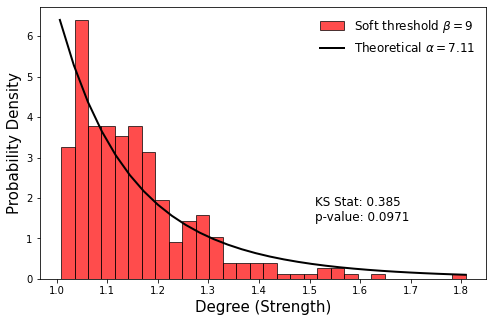

In [7]:
import powerlaw
from scipy.stats import chi2_contingency
from scipy.stats import ks_2samp

# Step 3: Filter the nodes with strength >= x_min
power=9
alpha=-slope
degree = np.sum(dfhealthy_pow, axis=1)
nodes_to_keep = degree[(degree > x_min) & (degree < x_max)].index  # Get indices of nodes with strength > x_min

# Step 4: Create a new adjacency matrix with filtered nodes
dfhealthy_filtered = dfhealthy_pow.loc[nodes_to_keep, nodes_to_keep]
print(dfhealthy_filtered.shape)


degree = np.sum(dfhealthy_filtered, axis=1)

# Plot the degree distribution in log-log scale
plt.figure(figsize=(8, 5))

# Compute the histogram (degree distribution)
counts, bin_edges, _ = plt.hist(
    degree, bins=30, density=True, facecolor='red', alpha=0.7, edgecolor='black', 
    label=fr"Soft threshold $\beta = {power}$"
)

# Compute the theoretical power-law PDF
xmin = x_min  # Choose minimum value to define the power-law range
x = np.linspace(xmin, max(degree), 30)
theoretical_pdf = (alpha - 1) * xmin**(alpha - 1) * x**(-alpha)
# theoretical_pdf = (xmin**(power - 1)) * (x**-power)  # Power-law formula

# Scale the theoretical PDF to match the empirical histogram
scaling_factor = max(counts) / max(theoretical_pdf)  # Match peak values
theoretical_pdf *= scaling_factor

# Plot the theoretical power-law distribution
plt.plot(x, theoretical_pdf, 'k-', linewidth=2, label=fr"Theoretical $\alpha = {alpha:0.2f}$")

# Annotate KS-statistic and p-value below the legend
# ---- Perform Statistical Tests ----
# Compare theoretical vs empirical
ks_statistic, p_value = ks_2samp(y_vals1[linear_region_mask], theoretical_pdf)


# Print the results
print(f"Kstat: {ks_statistic:.3f}")
print(f"p-value: {p_value:.3f}")

# Create legend and get its bounding box
legend = plt.legend(frameon=False, fontsize=12)
plt.gcf().canvas.draw()  # Force a draw to update legend size
bbox = legend.get_window_extent().transformed(plt.gca().transAxes.inverted())

# # Get bottom position of the legend and place annotation below it
text_y = bbox.y0 - 0.5  # Slightly below legend

# Annotate KS-statistic and p-value below the legend
plt.text(
    bbox.x0, text_y, 
    f"KS Stat: {ks_statistic:.3f}\np-value{' < 0.0001' if p_value < 0.0001 else f': {p_value:.4f}'}", 
    transform=plt.gca().transAxes, fontsize=12, verticalalignment='top'
)
# Labels and title
plt.xlabel("Degree (Strength)", fontsize=15)
plt.ylabel("Probability Density", fontsize=15)
plt.legend(frameon=False, fontsize=12)

# ---- Perform Statistical Tests ----
# Compare truncated powerlaw vs lognormal & exponential
print(y_vals1[linear_region_mask])
fit = powerlaw.Fit(y_vals1[linear_region_mask], discrete=False)
print("--- Power Law Fit Parameters ---")
print(f"Estimated Alpha (exponent of power law): {fit.power_law.alpha:.3f}")
print(f"Estimated Xmin (lower bound of power-law behavior): {fit.power_law.xmin:.3f}")
print("-" * 40)

print("--- Distribution Comparisons (Likelihood Ratio Test) ---")

# Compare Power Law vs. Log-normal distribution
# Log-normal is a common alternative for heavy-tailed data.
R_pl_vs_ln, p_pl_vs_ln = fit.distribution_compare('power_law', 'lognormal')
print(f"Power Law vs. Lognormal: R = {R_pl_vs_ln:.3f}, p = {p_pl_vs_ln:.3f}")
if R_pl_vs_ln > 0 and p_pl_vs_ln < 0.05:
    print("  --> Power Law is a significantly better fit than Lognormal.")
elif R_pl_vs_ln < 0 and p_pl_vs_ln < 0.05:
    print("  --> Lognormal is a significantly better fit than Power Law.")
else:
    print("  --> Neither is significantly better, or the difference is not strong enough.")

# Exponential is a common alternative for heavy-tailed data.
R_pl_vs_ln, p_pl_vs_ln = fit.distribution_compare('power_law', 'exponential')
print(f"Power Law vs. Lognormal: R = {R_pl_vs_ln:.3f}, p = {p_pl_vs_ln:.3f}")
if R_pl_vs_ln > 0 and p_pl_vs_ln < 0.05:
    print("  --> Power Law is a significantly better fit than Exponential.")
elif R_pl_vs_ln < 0 and p_pl_vs_ln < 0.05:
    print("  --> Exponential is a significantly better fit than Power Law.")
else:
    print("  --> Neither is significantly better, or the difference is not strong enough.")


# Save and show the plot
plt.savefig(f"healthy-adjPow{power}_theoretical_0.1.png", dpi=600, bbox_inches='tight', facecolor="white")
plt.show()

In [9]:
# Step 3: Filter the nodes with strength >= x_min
degree = np.sum(dfhealthy_pow, axis=1)
nodes_to_keep = degree[(degree > x_min) & (degree < x_max)].index  # Get indices of nodes with strength > x_min

# Step 4: Create a new adjacency matrix with filtered nodes
dfhealthy_filtered = dfhealthy_pow.loc[nodes_to_keep, nodes_to_keep]
print(dfhealthy_filtered.shape)

# Step 5: Save the filtered adjacency matrix to a text file
dfhealthy_filtered.to_csv(f'healthy_scalefree{power}_0.1.csv')
dfhealthy_filtered.head(5)

(287, 287)


,Gene_1,Gene_2,Gene_3,Gene_4,Gene_5,Gene_6,Gene_7,Gene_8,Gene_9,Gene_10,...,Gene_291,Gene_292,Gene_293,Gene_294,Gene_295,Gene_296,Gene_297,Gene_298,Gene_299,Gene_300
Gene_1,1.000000,0.000091,0.000081,0.000134,0.000683,0.000034,0.000022,0.000130,0.000073,0.000016,...,1.449347e-05,0.000002,3.456459e-06,1.273453e-07,9.651927e-07,6.096084e-07,0.000005,2.039507e-07,5.117956e-07,0.000003
Gene_2,0.000091,1.000000,0.000435,0.000660,0.000112,0.000213,0.000043,0.000041,0.001448,0.000034,...,1.204068e-06,0.000004,6.242991e-06,3.732378e-06,3.401902e-06,4.654539e-07,0.000017,1.386916e-06,1.700011e-05,0.000003
Gene_3,0.000081,0.000435,1.000000,0.004606,0.000460,0.001766,0.002276,0.002450,0.000182,0.002023,...,2.001456e-06,0.000001,1.075815e-05,1.400177e-06,2.765191e-06,1.413653e-07,0.000053,1.024541e-05,4.411909e-07,0.000014
Gene_4,0.000134,0.000660,0.004606,1.000000,0.002258,0.001579,0.000733,0.004045,0.000108,0.000092,...,1.710708e-06,0.000004,3.279768e-07,1.917595e-05,3.429217e-07,1.045517e-06,0.000139,5.502096e-06,4.342274e-06,0.000032
Gene_5,0.000683,0.000112,0.000460,0.002258,1.000000,0.001249,0.002731,0.000205,0.000894,0.000287,...,4.920056e-07,0.000083,1.129161e-05,5.025534e-06,2.573640e-06,4.672490e-07,0.000096,3.023958e-05,2.460161e-05,0.000042


## 2.2 Low variability (High overlap = 0.1)
aka Diseased

In [21]:
dfdis = pd.read_csv("dcor_synthetic_diseased_0.1.csv", index_col=0)
dfdis.head(5)

,Gene_1,Gene_2,Gene_3,Gene_4,Gene_5,Gene_6,Gene_7,Gene_8,Gene_9,Gene_10,...,Gene_291,Gene_292,Gene_293,Gene_294,Gene_295,Gene_296,Gene_297,Gene_298,Gene_299,Gene_300
Gene_1,1.000000,0.355691,0.350963,0.371213,0.444883,0.319025,0.304228,0.369889,0.347181,0.293654,...,0.289970,0.235602,0.247276,0.171351,0.214597,0.203915,0.256153,0.180557,0.199991,0.242261
Gene_2,0.355691,1.000000,0.423180,0.443235,0.363947,0.390917,0.327084,0.325808,0.483667,0.318608,...,0.219935,0.248843,0.264065,0.249395,0.246839,0.197893,0.295054,0.223417,0.295155,0.247540
Gene_3,0.350963,0.423180,1.000000,0.550012,0.425760,0.494423,0.508565,0.512743,0.384071,0.501970,...,0.232711,0.224941,0.280525,0.223654,0.241220,0.173351,0.334943,0.279007,0.196719,0.289294
Gene_4,0.371213,0.443235,0.550012,1.000000,0.508112,0.488324,0.448402,0.542121,0.362347,0.355879,...,0.228687,0.252275,0.190344,0.299131,0.191288,0.216512,0.372672,0.260384,0.253624,0.316194
Gene_5,0.444883,0.363947,0.425760,0.508112,1.000000,0.475778,0.518973,0.389194,0.458405,0.404011,...,0.199117,0.351831,0.282037,0.257776,0.239304,0.197978,0.357827,0.314660,0.307528,0.326410


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


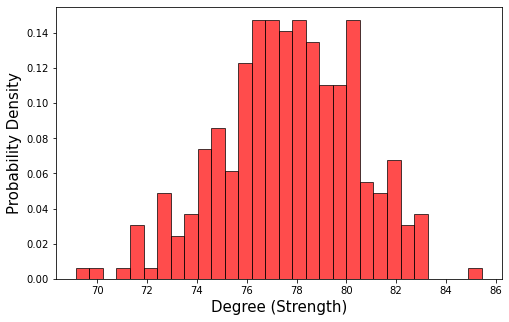

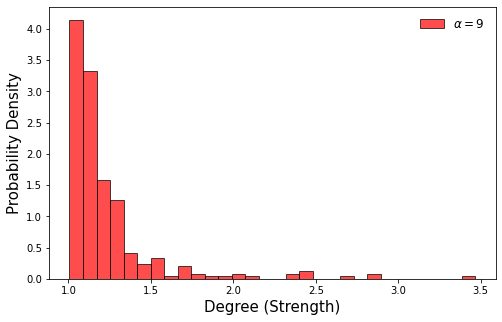

In [22]:
# Compute the degree (sum of weights) for each node
degree = np.sum(dfdis, axis=1)

# Plot the degree distribution
plt.figure(figsize=(8, 5))

# Compute the histogram (degree distribution)
counts, bin_edges, _ = plt.hist(degree, bins=30, density=True, facecolor='red', alpha=0.7, edgecolor='black') 

# Labels and title
plt.xlabel("Degree (Strength)", fontsize=15)
plt.ylabel("Probability Density", fontsize=15)
# plt.title("Histogram")
plt.legend(frameon=False, fontsize=12)
plt.savefig("diseased-adjPow1_0.1.png", dpi=600, bbox_inches='tight', facecolor="white")

# Compute the degree (sum of weights) for each node
power = 9
dfdis_pow = dfdis.pow(power)
# Compute the degree (sum of weights) for each node
degree = np.sum(dfdis_pow, axis=1)

# Plot the degree distribution
plt.figure(figsize=(8, 5))

# Compute the histogram (degree distribution)
counts2, bin_edges, _ = plt.hist(degree, bins=30, density=True, facecolor='red', alpha=0.7, edgecolor='black', label=fr"$\alpha = {power}$") 

# Labels and title
plt.xlabel("Degree (Strength)", fontsize=15)
plt.ylabel("Probability Density", fontsize=15)
# plt.title("Histogram")
plt.legend(frameon=False, fontsize=12)
plt.savefig(f"diseased-adjPow{power}_0.1.png", dpi=600, bbox_inches='tight', facecolor="white")
plt.show()

Estimated x_min: 1.01


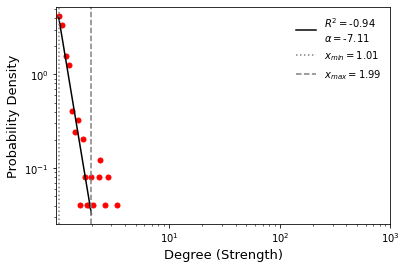

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from matplotlib.ticker import FuncFormatter

# Compute the histogram (degree distribution)
power = 9
# Plot the degree distribution on a log-log scale
plt.plot(bin_edges[:-1], counts2, 'ro', markersize=5)

# Define the range for the linear fit (e.g., from the 5th to 20th percentile of degrees)
x_vals = bin_edges[:-1]
y_vals2 = counts2

# Choose indices that cover the linear region of the plot
linear_region_mask = (x_vals > 1.0) & (x_vals < 2)  # Example: Filter degrees between 10 and 100 (adjust as needed)

# Linear regression on the selected region
slope, intercept, r_value, p_value, std_err = linregress(np.log(x_vals[linear_region_mask] + 1e-6), np.log(y_vals2[linear_region_mask]+1e-6))

fit_y_vals = np.exp(intercept) * (x_vals[linear_region_mask]**slope)

# Plot the linear fit for visualization
plt.plot(x_vals[linear_region_mask], fit_y_vals, '-', color="black", label=r"$R^{2} = $"+f"{r_value:.2f}\n"+r"$\alpha = $"+f"{slope:.2f}")

# Mark the x_min (where the linear region starts)
x_min = min(x_vals[linear_region_mask])
x_max = max(x_vals[linear_region_mask])

plt.axvline(x=x_min, color='gray', linestyle='dotted', label=r"$x_{min} = $"+f"{x_min:.2f}")
plt.axvline(x=x_max, color='gray', linestyle='--', label=r"$x_{max} = $"+f"{x_max:.2f}")

# Display the plot
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree (Strength)', fontsize=13)
plt.ylabel('Probability Density', fontsize=13)

# Custom x-axis formatter to show ticks as 10^x
def format_func(value, tick_number):
    return r'$10^{%d}$' % int(np.log10(value))

# Set the x-axis ticks manually at 10^1, 10^2, 10^3, and 10^4
plt.xticks([10**i for i in range(1, 4)])

# Apply the custom formatter
plt.gca().get_xaxis().set_major_formatter(FuncFormatter(format_func))

plt.legend(loc='upper right', frameon=False)


# Print the x_min
print(f"Estimated x_min: {x_min:.2f}")
plt.savefig(f"diseased-powerlaw{power}_0.1.png", dpi=600, bbox_inches='tight', facecolor="white")
plt.show()

(287, 287)
[4.14463033 3.33195772 1.5847116  1.25964255 0.40633631 0.24380178
 0.32506905 0.04063363 0.20316815 0.08126726 0.04063363 0.04063363
 0.08126726]
Kstat: 0.385
p-value: 0.097
--- Power Law Fit Parameters ---
Estimated Alpha (exponent of power law): 1.514
Estimated Xmin (lower bound of power-law behavior): 0.041
----------------------------------------
--- Distribution Comparisons (Likelihood Ratio Test) ---
Power Law vs. Lognormal: R = -0.300, p = 0.666

Calculating best minimal value for power law fit
/Users/jcbacong/opt/miniconda3/envs/meowth/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /



  --> Neither is significantly better, or the difference is not strong enough.
Power Law vs. Lognormal: R = 5.81, p = 0.227
  --> Neither is significantly better, or the difference is not strong enough.


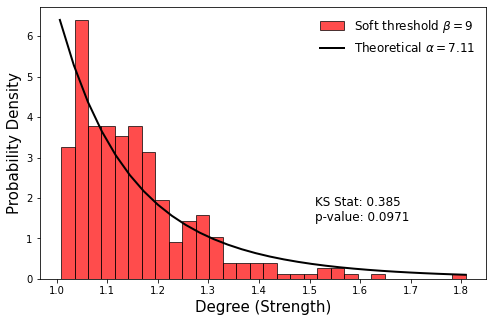

In [24]:
import powerlaw
from scipy.stats import chi2_contingency
from scipy.stats import anderson_ksamp

# Step 3: Filter the nodes with strength >= x_min
power=9
alpha=-slope
degree = np.sum(dfdis_pow, axis=1)
nodes_to_keep = degree[(degree > x_min) & (degree < x_max)].index  # Get indices of nodes with strength > x_min

# Step 4: Create a new adjacency matrix with filtered nodes
dfdis_filtered = dfdis_pow.loc[nodes_to_keep, nodes_to_keep]
print(dfdis_filtered.shape)


degree = np.sum(dfdis_filtered, axis=1)

# Plot the degree distribution in log-log scale
plt.figure(figsize=(8, 5))

# Compute the histogram (degree distribution)
counts, bin_edges, _ = plt.hist(
    degree, bins=30, density=True, facecolor='red', alpha=0.7, edgecolor='black', 
    label=fr"Soft threshold $\beta = {power}$"
)

# Compute the theoretical power-law PDF
xmin = x_min  # Choose minimum value to define the power-law range
x = np.linspace(xmin, max(degree), 30)
theoretical_pdf = (alpha - 1) * xmin**(alpha - 1) * x**(-alpha)
# theoretical_pdf = (xmin**(power - 1)) * (x**-power)  # Power-law formula

# Scale the theoretical PDF to match the empirical histogram
scaling_factor = max(counts) / max(theoretical_pdf)  # Match peak values
theoretical_pdf *= scaling_factor

# Plot the theoretical power-law distribution
plt.plot(x, theoretical_pdf, 'k-', linewidth=2, label=fr"Theoretical $\alpha = {alpha:0.2f}$")

# Annotate KS-statistic and p-value below the legend
# ---- Perform Statistical Tests ----
# Compare theoretical vs empirical
print(y_vals2[linear_region_mask])
ks_statistic, p_value = ks_2samp(y_vals2[linear_region_mask], theoretical_pdf)


# Print the results
print(f"Kstat: {ks_statistic:.3f}")
print(f"p-value: {p_value:.3f}")

# Create legend and get its bounding box
legend = plt.legend(frameon=False, fontsize=12)
plt.gcf().canvas.draw()  # Force a draw to update legend size
bbox = legend.get_window_extent().transformed(plt.gca().transAxes.inverted())

# Get bottom position of the legend and place annotation below it
text_y = bbox.y0 - 0.5  # Slightly below legend

# Annotate KS-statistic and p-value below the legend
plt.text(
    bbox.x0, text_y, 
    f"KS Stat: {ks_statistic:.3f}\np-value{' < 0.0001' if p_value < 0.0001 else f': {p_value:.4f}'}", 
    transform=plt.gca().transAxes, fontsize=12, verticalalignment='top'
)
# Labels and title
plt.xlabel("Degree (Strength)", fontsize=15)
plt.ylabel("Probability Density", fontsize=15)
plt.legend(frameon=False, fontsize=12)

# ---- Perform Statistical Tests ----
# Compare truncated powerlaw vs lognormal & exponential
fit = powerlaw.Fit(y_vals2[linear_region_mask], discrete=False)
print("--- Power Law Fit Parameters ---")
print(f"Estimated Alpha (exponent of power law): {fit.power_law.alpha:.3f}")
print(f"Estimated Xmin (lower bound of power-law behavior): {fit.power_law.xmin:.3f}")
print("-" * 40)

print("--- Distribution Comparisons (Likelihood Ratio Test) ---")

# Compare Power Law vs. Log-normal distribution
# Log-normal is a common alternative for heavy-tailed data.
R_pl_vs_ln, p_pl_vs_ln = fit.distribution_compare('power_law', 'lognormal')
print(f"Power Law vs. Lognormal: R = {R_pl_vs_ln:.3f}, p = {p_pl_vs_ln:.3f}")
if R_pl_vs_ln > 0 and p_pl_vs_ln < 0.05:
    print("  --> Power Law is a significantly better fit than Lognormal.")
elif R_pl_vs_ln < 0 and p_pl_vs_ln < 0.05:
    print("  --> Lognormal is a significantly better fit than Power Law.")
else:
    print("  --> Neither is significantly better, or the difference is not strong enough.")

# Exponential is a common alternative for heavy-tailed data.
R_pl_vs_ln, p_pl_vs_ln = fit.distribution_compare('power_law', 'exponential')
print(f"Power Law vs. Lognormal: R = {R_pl_vs_ln:.2f}, p = {p_pl_vs_ln:.3f}")
if R_pl_vs_ln > 0 and p_pl_vs_ln < 0.05:
    print("  --> Power Law is a significantly better fit than Exponential.")
elif R_pl_vs_ln < 0 and p_pl_vs_ln < 0.05:
    print("  --> Exponential is a significantly better fit than Power Law.")
else:
    print("  --> Neither is significantly better, or the difference is not strong enough.")


# Save and show the plot
plt.savefig(f"diseased-adjPow{power}_theoretical_0.1.png", dpi=600, bbox_inches='tight', facecolor="white")
plt.show()

In [26]:
# Step 3: Filter the nodes with strength >= x_min
nodes_to_keep = degree[(degree > x_min) & (degree < x_max)].index  # Get indices of nodes with strength > x_min

# Step 4: Create a new adjacency matrix with filtered nodes
diseased_pow = dfdis_pow.loc[nodes_to_keep, nodes_to_keep]
print(diseased_pow.shape)

# Step 5: Save the filtered adjacency matrix to a text file
diseased_pow.to_csv(f'diseased_scalefree{power}_0.1.csv')
diseased_pow.head(5)

(287, 287)


,Gene_1,Gene_2,Gene_3,Gene_4,Gene_5,Gene_6,Gene_7,Gene_8,Gene_9,Gene_10,...,Gene_291,Gene_292,Gene_293,Gene_294,Gene_295,Gene_296,Gene_297,Gene_298,Gene_299,Gene_300
Gene_1,1.000000,0.000091,0.000081,0.000134,0.000683,0.000034,0.000022,0.000130,0.000073,0.000016,...,1.449347e-05,0.000002,3.456459e-06,1.273453e-07,9.651927e-07,6.096084e-07,0.000005,2.039507e-07,5.117956e-07,0.000003
Gene_2,0.000091,1.000000,0.000435,0.000660,0.000112,0.000213,0.000043,0.000041,0.001448,0.000034,...,1.204068e-06,0.000004,6.242991e-06,3.732378e-06,3.401902e-06,4.654539e-07,0.000017,1.386916e-06,1.700011e-05,0.000003
Gene_3,0.000081,0.000435,1.000000,0.004606,0.000460,0.001766,0.002276,0.002450,0.000182,0.002023,...,2.001456e-06,0.000001,1.075815e-05,1.400177e-06,2.765191e-06,1.413653e-07,0.000053,1.024541e-05,4.411909e-07,0.000014
Gene_4,0.000134,0.000660,0.004606,1.000000,0.002258,0.001579,0.000733,0.004045,0.000108,0.000092,...,1.710708e-06,0.000004,3.279768e-07,1.917595e-05,3.429217e-07,1.045517e-06,0.000139,5.502096e-06,4.342274e-06,0.000032
Gene_5,0.000683,0.000112,0.000460,0.002258,1.000000,0.001249,0.002731,0.000205,0.000894,0.000287,...,4.920056e-07,0.000083,1.129161e-05,5.025534e-06,2.573640e-06,4.672490e-07,0.000096,3.023958e-05,2.460161e-05,0.000042


## 3. Nonshock Samples

In [19]:
dfnonsh = pd.read_csv("dcor/dcor_preshock.csv", index_col=0)
dfnonsh.head(5)

,44986,44988,44989,44990,44991,44992,44993,44994,44995,44996,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
44986,1.000000,0.270313,0.305390,0.377117,0.271709,0.346919,0.389666,0.178827,0.170994,0.230879,...,0.251437,0.219910,0.237874,0.223510,0.209195,0.225740,0.170993,0.305651,0.255662,0.249389
44988,0.270313,1.000000,0.255838,0.208708,0.222271,0.190507,0.187324,0.207095,0.199602,0.287060,...,0.246425,0.171662,0.306526,0.288950,0.237931,0.268214,0.181113,0.235377,0.157975,0.191720
44989,0.305390,0.255838,1.000000,0.203838,0.289745,0.206068,0.202819,0.217723,0.293150,0.197918,...,0.328613,0.251982,0.237685,0.145014,0.215742,0.313031,0.185768,0.334093,0.307645,0.279729
44990,0.377117,0.208708,0.203838,1.000000,0.235521,0.254200,0.331596,0.153168,0.217747,0.234292,...,0.241315,0.263021,0.223512,0.241392,0.343864,0.215380,0.178192,0.181844,0.346978,0.256367
44991,0.271709,0.222271,0.289745,0.235521,1.000000,0.236659,0.230879,0.203184,0.240084,0.223668,...,0.326185,0.205975,0.187665,0.254409,0.234282,0.245974,0.261062,0.311854,0.262370,0.312222


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


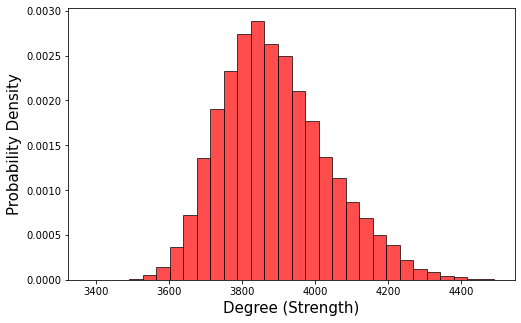

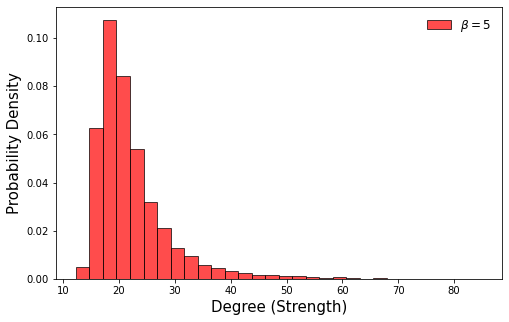

In [36]:
# Compute the degree (sum of weights) for each node
degree = np.sum(dfnonsh, axis=1)

# Plot the degree distribution in log-log scale
plt.figure(figsize=(8, 5))

# Compute the histogram (degree distribution)
counts, bin_edges, _ = plt.hist(degree, bins=30, density=True, facecolor='red', alpha=0.7, edgecolor='black') 

# Labels and title
plt.xlabel("Degree (Strength)", fontsize=15)
plt.ylabel("Probability Density", fontsize=15)
# plt.title("Histogram")
plt.legend(frameon=False, fontsize=12)
plt.savefig("dcor/nonshock-adjPow1.png", dpi=600, bbox_inches='tight', facecolor="white")

# Compute the degree (sum of weights) for each node
power = 5
dfnonsh_pow = dfnonsh.pow(power)
# Compute the degree (sum of weights) for each node
degree = np.sum(dfnonsh_pow, axis=1)

# Plot the degree distribution in log-log scale
plt.figure(figsize=(8, 5))

# Compute the histogram (degree distribution)
counts3, bin_edges, _ = plt.hist(degree, bins=30, density=True, facecolor='red', alpha=0.7, edgecolor='black', label=fr"$\beta = {power}$") 
# Plot the degree distribution 

# Labels and title
plt.xlabel("Degree (Strength)", fontsize=15)
plt.ylabel("Probability Density", fontsize=15)
# plt.title("Histogram")
plt.legend(frameon=False, fontsize=12)
plt.savefig(f"dcor/nonshock-adjPow{power}.png", dpi=600, bbox_inches='tight', facecolor="white")
plt.show()

Estimated x_min: 19.55


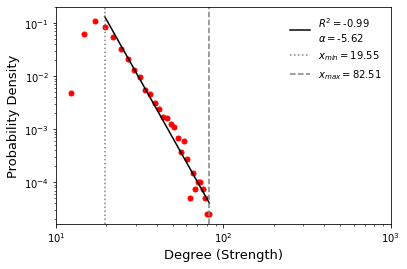

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from matplotlib.ticker import FuncFormatter

# Compute the histogram (degree distribution)
# counts, bin_edges = np.histogram(degree, bins=np.logspace(np.log10(min(degree[degree>0])), np.log10(max(degree)), 30), density=True)

power = 5
# Plot the degree distribution on a log-log scale
plt.plot(bin_edges[:-1], counts3, 'ro', markersize=5)

# Define the range for the linear fit (e.g., from the 5th to 20th percentile of degrees)
x_vals = bin_edges[:-1]
y_vals3 = counts3

# Choose indices that cover the linear region of the plot
linear_region_mask = (x_vals > 17.5) & (x_vals < 200)  # Example: Filter degrees between 10 and 100 (adjust as needed)

# Linear regression on the selected region
slope, intercept, r_value, p_value, std_err = linregress(np.log(x_vals[linear_region_mask] + 1e-6), np.log(y_vals3[linear_region_mask]+1e-6))

fit_y_vals = np.exp(intercept) * (x_vals[linear_region_mask]**slope)

# Plot the linear fit for visualization
plt.plot(x_vals[linear_region_mask], fit_y_vals, '-', color="black", label=r"$R^{2} = $"+f"{r_value:.2f}\n"+r"$\alpha = $"+f"{slope:.2f}")

# Mark the x_min (where the linear region starts)
x_min = min(x_vals[linear_region_mask])
x_max = max(x_vals[linear_region_mask])

plt.axvline(x=x_min, color='gray', linestyle='dotted', label=r"$x_{min} = $"+f"{x_min:.2f}")
plt.axvline(x=x_max, color='gray', linestyle='--', label=r"$x_{max} = $"+f"{x_max:.2f}")

# Display the plot
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree (Strength)', fontsize=13)
plt.ylabel('Probability Density', fontsize=13)

# Custom x-axis formatter to show ticks as 10^x
def format_func(value, tick_number):
    return r'$10^{%d}$' % int(np.log10(value))

# Set the x-axis ticks manually at 10^1, 10^2, 10^3, and 10^4
plt.xticks([10**i for i in range(1, 4)])

# Apply the custom formatter
plt.gca().get_xaxis().set_major_formatter(FuncFormatter(format_func))

plt.legend(loc='upper right', frameon=False)


# Print the x_min
print(f"Estimated x_min: {x_min:.2f}")
plt.savefig(f"dcor/nonshock-powerlaw{power}.png", dpi=600, bbox_inches='tight', facecolor="white")
plt.show()

(9439, 9439)
[8.44204295e-02 5.41369958e-02 3.19476356e-02 2.11807529e-02
 1.28597428e-02 9.53133881e-03 5.54734005e-03 4.58916313e-03
 3.12668257e-03 2.39544229e-03 1.71463238e-03 1.61377165e-03
 1.26075910e-03 1.10946801e-03 6.80809915e-04 3.78227731e-04
 6.05164369e-04 2.77367002e-04 5.04303641e-05 1.51291092e-04
 7.56455461e-05 1.00860728e-04 1.00860728e-04 7.56455461e-05
 5.04303641e-05 2.52151820e-05 2.52151820e-05]
Kstat: 0.163
p-value: 0.773


Calculating best minimal value for power law fit
/Users/jcbacong/opt/miniconda3/envs/meowth/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /
/Users/jcbacong/opt/miniconda3/envs/meowth/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: divide by zero encountered in true_divide
  (CDF_diff**2) /


--- Power Law Fit Parameters ---
Estimated Alpha (exponent of power law): 1.297
Estimated Xmin (lower bound of power-law behavior): 0.000
----------------------------------------
--- Distribution Comparisons (Likelihood Ratio Test) ---
Power Law vs. Lognormal: R = -1.005, p = 0.404
  --> Neither is significantly better, or the difference is not strong enough.
Power Law vs. Lognormal: R = 40.093, p = 0.001
  --> Power Law is a significantly better fit than Exponential.


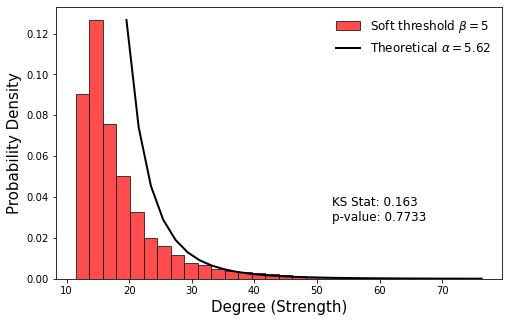

In [39]:
from scipy.stats import chi2_contingency
from scipy.stats import anderson_ksamp

# Step 3: Filter the nodes with strength >= x_min
power=5
alpha=-slope
degree = np.sum(dfnonsh_pow, axis=1)
nodes_to_keep = degree[(degree > x_min) & (degree < x_max)].index  # Get indices of nodes with strength > x_min

# Step 4: Create a new adjacency matrix with filtered nodes
dfnonsh_filtered = dfnonsh_pow.loc[nodes_to_keep, nodes_to_keep]
print(dfnonsh_filtered.shape)


degree = np.sum(dfnonsh_filtered, axis=1)

# Plot the degree distribution in log-log scale
plt.figure(figsize=(8, 5))

# Compute the histogram (degree distribution)
counts, bin_edges, _ = plt.hist(
    degree, bins=30, density=True, facecolor='red', alpha=0.7, edgecolor='black', 
    label=fr"Soft threshold $\beta = {power}$"
)

# Compute the theoretical power-law PDF
xmin = x_min  # Choose minimum value to define the power-law range
x = np.linspace(xmin, max(degree), 30)
theoretical_pdf = (alpha - 1) * xmin**(alpha - 1) * x**(-alpha)
# theoretical_pdf = (xmin**(power - 1)) * (x**-power)  # Power-law formula

# Scale the theoretical PDF to match the empirical histogram
scaling_factor = max(counts) / max(theoretical_pdf)  # Match peak values
theoretical_pdf *= scaling_factor

# Plot the theoretical power-law distribution
plt.plot(x, theoretical_pdf, 'k-', linewidth=2, label=fr"Theoretical $\alpha = {alpha:0.2f}$")

# Annotate KS-statistic and p-value below the legend
# ---- Perform Statistical Tests ----
# Compare theoretical vs empirical
print(y_vals3[linear_region_mask])
ks_statistic, p_value = ks_2samp(y_vals3[linear_region_mask], theoretical_pdf)

# Print the results
print(f"Kstat: {ks_statistic:.3f}")
print(f"p-value: {p_value:.3f}")


# Create legend and get its bounding box
legend = plt.legend(frameon=False, fontsize=12)
plt.gcf().canvas.draw()  # Force a draw to update legend size
bbox = legend.get_window_extent().transformed(plt.gca().transAxes.inverted())

# Get bottom position of the legend and place annotation below it
text_y = bbox.y0 - 0.5  # Slightly below legend

# Annotate KS-statistic and p-value below the legend
plt.text(
    bbox.x0, text_y, 
    f"KS Stat: {ks_statistic:.3f}\np-value{' < 0.0001' if p_value < 0.0001 else f': {p_value:.4f}'}", 
    transform=plt.gca().transAxes, fontsize=12, verticalalignment='top'
)
# Labels and title
plt.xlabel("Degree (Strength)", fontsize=15)
plt.ylabel("Probability Density", fontsize=15)
plt.legend(frameon=False, fontsize=12)

# ---- Perform Statistical Tests ----
# Compare truncated powerlaw vs lognormal & exponential
fit = powerlaw.Fit(y_vals[linear_region_mask], discrete=False)
print("--- Power Law Fit Parameters ---")
print(f"Estimated Alpha (exponent of power law): {fit.power_law.alpha:.3f}")
print(f"Estimated Xmin (lower bound of power-law behavior): {fit.power_law.xmin:.3f}")
print("-" * 40)

print("--- Distribution Comparisons (Likelihood Ratio Test) ---")

# Compare Power Law vs. Log-normal distribution
# Log-normal is a common alternative for heavy-tailed data.
R_pl_vs_ln, p_pl_vs_ln = fit.distribution_compare('power_law', 'lognormal')
print(f"Power Law vs. Lognormal: R = {R_pl_vs_ln:.3f}, p = {p_pl_vs_ln:.3f}")
if R_pl_vs_ln > 0 and p_pl_vs_ln < 0.05:
    print("  --> Power Law is a significantly better fit than Lognormal.")
elif R_pl_vs_ln < 0 and p_pl_vs_ln < 0.05:
    print("  --> Lognormal is a significantly better fit than Power Law.")
else:
    print("  --> Neither is significantly better, or the difference is not strong enough.")

# Exponential is a common alternative for heavy-tailed data.
R_pl_vs_ln, p_pl_vs_ln = fit.distribution_compare('power_law', 'exponential')
print(f"Power Law vs. Lognormal: R = {R_pl_vs_ln:.3f}, p = {p_pl_vs_ln:.3f}")
if R_pl_vs_ln > 0 and p_pl_vs_ln < 0.05:
    print("  --> Power Law is a significantly better fit than Exponential.")
elif R_pl_vs_ln < 0 and p_pl_vs_ln < 0.05:
    print("  --> Exponential is a significantly better fit than Power Law.")
else:
    print("  --> Neither is significantly better, or the difference is not strong enough.")

# Labels and title
plt.xlabel("Degree (Strength)", fontsize=15)
plt.ylabel("Probability Density", fontsize=15)
plt.legend(frameon=False, fontsize=12)

# Save and show the plot
plt.savefig(f"dcor/nonshock-adjPow{power}_theoretical.png", dpi=600, bbox_inches='tight', facecolor="white")
plt.show()

In [15]:
# Step 3: Filter the nodes with strength >= x_min
nodes_to_keep = degree[(degree > x_min) & (degree < x_max)].index  # Get indices of nodes with strength > x_min

# Step 4: Create a new adjacency matrix with filtered nodes
nonshock_pow = dfnonsh_pow.loc[nodes_to_keep, nodes_to_keep]
print(nonshock_pow.shape)

# Step 5: Save the filtered adjacency matrix to a text file
nonshock_pow.to_csv(f'dcor/nonshock_scalefree{power}.csv')
nonshock_pow.head(5)

(2647, 2647)


,44986,44991,44993,45170,45175,45178,45180,45184,AAK1,AARS,...,ZNF84,ZNF860,ZNF91,ZNF92,ZNFX1,ZNHIT6,ZNRD1,ZRANB2,ZSWIM6,ZYX
44986,1.000000,0.001481,0.008984,0.021238,0.037826,0.002432,0.000556,0.000105,0.010521,0.001444,...,0.002807,0.012752,0.004892,0.014314,0.005346,0.002650,0.000354,0.000293,0.015910,0.002668
44991,0.001481,1.000000,0.000656,0.005631,0.004520,0.000548,0.000553,0.000752,0.004087,0.000402,...,0.001193,0.002235,0.000425,0.000565,0.006117,0.000190,0.000460,0.001459,0.000179,0.002950
44993,0.008984,0.000656,1.000000,0.017130,0.018307,0.000503,0.007317,0.000961,0.005415,0.001803,...,0.000817,0.005461,0.001560,0.001070,0.000469,0.000345,0.000687,0.001267,0.001151,0.000398
45170,0.021238,0.005631,0.017130,1.000000,0.077221,0.002889,0.000483,0.002807,0.080245,0.003093,...,0.011524,0.003813,0.036254,0.007042,0.000453,0.014874,0.000207,0.009978,0.000528,0.001265
45175,0.037826,0.004520,0.018307,0.077221,1.000000,0.000452,0.003956,0.000239,0.063809,0.000643,...,0.007609,0.030050,0.061511,0.009090,0.000344,0.017550,0.000234,0.004789,0.006868,0.000861


## 4. Shock Samples

In [23]:
dfshock = pd.read_csv("dcor/dcor_shock.csv", index_col=0)
dfshock.head(5)

,44986,44988,44989,44990,44991,44992,44993,44994,44995,44996,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
44986,1.000000,0.433678,0.782599,0.482797,0.550353,0.350446,0.372248,0.459573,0.556204,0.387088,...,0.317219,0.366424,0.427024,0.541247,0.302669,0.514203,0.357441,0.310696,0.270150,0.459290
44988,0.433678,1.000000,0.417738,0.337274,0.328232,0.372369,0.363153,0.345802,0.348738,0.407500,...,0.301661,0.343050,0.385846,0.371604,0.361609,0.400664,0.430886,0.366171,0.383954,0.450485
44989,0.782599,0.417738,1.000000,0.358043,0.409572,0.452594,0.363144,0.394708,0.425616,0.417953,...,0.306233,0.511621,0.466007,0.455461,0.401493,0.477344,0.430486,0.355138,0.339066,0.370314
44990,0.482797,0.337274,0.358043,1.000000,0.461209,0.335887,0.639926,0.426543,0.411214,0.336553,...,0.351797,0.582079,0.502504,0.488392,0.460067,0.402514,0.282278,0.490976,0.369674,0.330388
44991,0.550353,0.328232,0.409572,0.461209,1.000000,0.279255,0.426424,0.558411,0.537261,0.312075,...,0.345706,0.353071,0.343791,0.250058,0.278680,0.278124,0.484317,0.332084,0.229615,0.392750


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


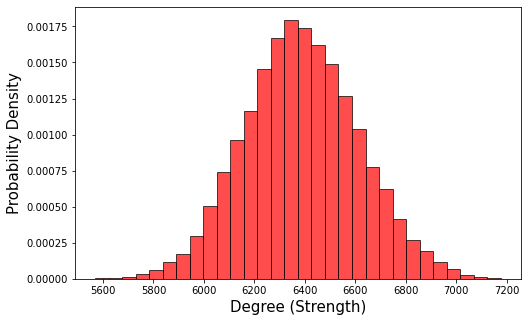

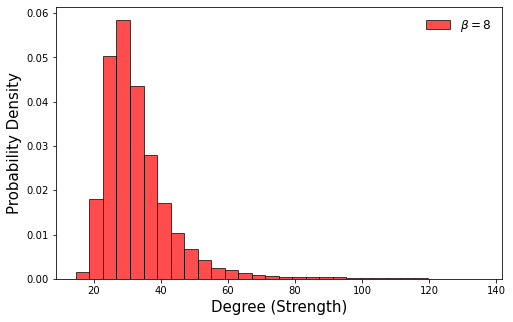

In [40]:
# Compute the degree (sum of weights) for each node
degree = np.sum(dfshock, axis=1)

# Plot the degree distribution in log-log scale
plt.figure(figsize=(8, 5))

# Compute the histogram (degree distribution)
counts, bin_edges, _ = plt.hist(degree, bins=30, density=True, facecolor='red', alpha=0.7, edgecolor='black') 

# Labels and title
plt.xlabel("Degree (Strength)", fontsize=15)
plt.ylabel("Probability Density", fontsize=15)
# plt.title("Histogram")
plt.legend(frameon=False, fontsize=12)
plt.savefig("dcor/shock-adjPow1.png", dpi=600, bbox_inches='tight', facecolor="white")

# Compute the degree (sum of weights) for each node
power = 8
dfshock_pow = dfshock.pow(power)
# Compute the degree (sum of weights) for each node
degree = np.sum(dfshock_pow, axis=1)

# Plot the degree distribution in log-log scale
plt.figure(figsize=(8, 5))

# Compute the histogram (degree distribution)
counts4, bin_edges, _ = plt.hist(degree, bins=30, density=True, facecolor='red', alpha=0.7, edgecolor='black', label=fr"$\beta = {power}$") 

# Labels and title
plt.xlabel("Degree (Strength)", fontsize=15)
plt.ylabel("Probability Density", fontsize=15)
# plt.title("Histogram")
plt.legend(frameon=False, fontsize=12)
plt.savefig(f"dcor/shock-adjPow{power}.png", dpi=600, bbox_inches='tight', facecolor="white")
plt.show()

Estimated x_min: 26.78


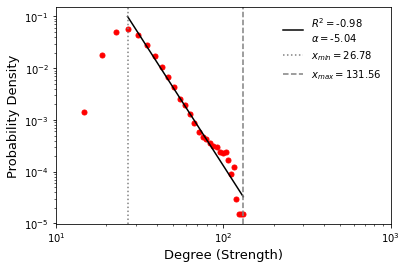

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from matplotlib.ticker import FuncFormatter

# Compute the histogram (degree distribution)
# counts, bin_edges = np.histogram(degree, bins=np.logspace(np.log10(min(degree[degree>0])), np.log10(max(degree)), 30), density=True)

power = 8
# Plot the degree distribution on a log-log scale
plt.plot(bin_edges[:-1], counts4, 'ro', markersize=5)

# Define the range for the linear fit (e.g., from the 5th to 20th percentile of degrees)
x_vals = bin_edges[:-1]
y_vals4 = counts4

# Choose indices that cover the linear region of the plot
linear_region_mask = (x_vals > 23) & (x_vals < 200)  # Example: Filter degrees between 10 and 100 (adjust as needed)

# Linear regression on the selected region
slope, intercept, r_value, p_value, std_err = linregress(np.log(x_vals[linear_region_mask] + 1e-6), np.log(y_vals4[linear_region_mask]+1e-6))

fit_y_vals = np.exp(intercept) * (x_vals[linear_region_mask]**slope)

# Plot the linear fit for visualization
plt.plot(x_vals[linear_region_mask], fit_y_vals, '-', color="black", label=r"$R^{2} = $"+f"{r_value:.2f}\n"+r"$\alpha = $"+f"{slope:.2f}")

# Mark the x_min (where the linear region starts)
x_min = min(x_vals[linear_region_mask])
x_max = max(x_vals[linear_region_mask])

plt.axvline(x=x_min, color='gray', linestyle='dotted', label=r"$x_{min} = $"+f"{x_min:.2f}")
plt.axvline(x=x_max, color='gray', linestyle='--', label=r"$x_{max} = $"+f"{x_max:.2f}")

# Display the plot
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree (Strength)', fontsize=13)
plt.ylabel('Probability Density', fontsize=13)

# Custom x-axis formatter to show ticks as 10^x
def format_func(value, tick_number):
    return r'$10^{%d}$' % int(np.log10(value))

# Set the x-axis ticks manually at 10^1, 10^2, 10^3, and 10^4
plt.xticks([10**i for i in range(1, 4)])

# Apply the custom formatter
plt.gca().get_xaxis().set_major_formatter(FuncFormatter(format_func))

plt.legend(loc='upper right', frameon=False)


# Print the x_min
print(f"Estimated x_min: {x_min:.2f}")
plt.savefig(f"dcor/shock-powerlaw{power}.png", dpi=600, bbox_inches='tight', facecolor="white")
plt.show()

(11784, 11784)
Kstat: 0.174
p-value: 0.701


Calculating best minimal value for power law fit
/Users/jcbacong/opt/miniconda3/envs/meowth/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /


--- Power Law Fit Parameters ---
Estimated Alpha (exponent of power law): 1.442
Estimated Xmin (lower bound of power-law behavior): 0.000
----------------------------------------
--- Distribution Comparisons (Likelihood Ratio Test) ---
Power Law vs. Lognormal: R = -0.472, p = 0.519
  --> Neither is significantly better, or the difference is not strong enough.
Power Law vs. Lognormal: R = 17.532, p = 0.013
  --> Power Law is a significantly better fit than Exponential.


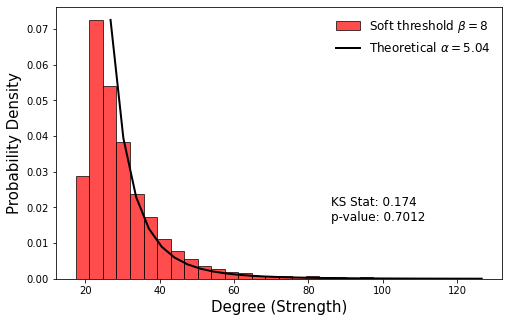

In [42]:
from scipy.stats import chi2_contingency
from scipy.stats import anderson_ksamp

# Step 3: Filter the nodes with strength >= x_min
power=8
alpha=-slope
degree = np.sum(dfshock_pow, axis=1)
nodes_to_keep = degree[(degree > x_min) & (degree < x_max)].index  # Get indices of nodes with strength > x_min

# Step 4: Create a new adjacency matrix with filtered nodes
dfshock_filtered = dfshock_pow.loc[nodes_to_keep, nodes_to_keep]
print(dfshock_filtered.shape)


degree = np.sum(dfshock_filtered, axis=1)

# Plot the degree distribution in log-log scale
plt.figure(figsize=(8, 5))

# Compute the histogram (degree distribution)
counts, bin_edges, _ = plt.hist(
    degree, bins=30, density=True, facecolor='red', alpha=0.7, edgecolor='black', 
    label=fr"Soft threshold $\beta = {power}$"
)

# Compute the theoretical power-law PDF
xmin = x_min  # Choose minimum value to define the power-law range
x = np.linspace(xmin, max(degree), 30)
theoretical_pdf = (alpha - 1) * xmin**(alpha - 1) * x**(-alpha)
# theoretical_pdf = (xmin**(power - 1)) * (x**-power)  # Power-law formula

# Scale the theoretical PDF to match the empirical histogram
scaling_factor = max(counts) / max(theoretical_pdf)  # Match peak values
theoretical_pdf *= scaling_factor

# Plot the theoretical power-law distribution
plt.plot(x, theoretical_pdf, 'k-', linewidth=2, label=fr"Theoretical $\alpha = {alpha:0.2f}$")

# Annotate KS-statistic and p-value below the legend
# ---- Perform Statistical Tests ----
# Compare theoretical vs empirical
ks_statistic, p_value = ks_2samp(y_vals4[linear_region_mask], theoretical_pdf)

# Print the results
print(f"Kstat: {ks_statistic:.3f}")
print(f"p-value: {p_value:.3f}")

# Create legend and get its bounding box
legend = plt.legend(frameon=False, fontsize=12)
plt.gcf().canvas.draw()  # Force a draw to update legend size
bbox = legend.get_window_extent().transformed(plt.gca().transAxes.inverted())

# Get bottom position of the legend and place annotation below it
text_y = bbox.y0 - 0.5  # Slightly below legend

# Annotate KS-statistic and p-value below the legend
plt.text(
    bbox.x0, text_y, 
    f"KS Stat: {ks_statistic:.3f}\np-value{' < 0.0001' if p_value < 0.0001 else f': {p_value:.4f}'}", 
    transform=plt.gca().transAxes, fontsize=12, verticalalignment='top'
)
# Labels and title
plt.xlabel("Degree (Strength)", fontsize=15)
plt.ylabel("Probability Density", fontsize=15)
plt.legend(frameon=False, fontsize=12)

# ---- Perform Statistical Tests ----
# Compare truncated powerlaw vs lognormal & exponential
fit = powerlaw.Fit(y_vals4[linear_region_mask], discrete=False)
print("--- Power Law Fit Parameters ---")
print(f"Estimated Alpha (exponent of power law): {fit.power_law.alpha:.3f}")
print(f"Estimated Xmin (lower bound of power-law behavior): {fit.power_law.xmin:.3f}")
print("-" * 40)

print("--- Distribution Comparisons (Likelihood Ratio Test) ---")

# Compare Power Law vs. Log-normal distribution
# Log-normal is a common alternative for heavy-tailed data.
R_pl_vs_ln, p_pl_vs_ln = fit.distribution_compare('power_law', 'lognormal')
print(f"Power Law vs. Lognormal: R = {R_pl_vs_ln:.3f}, p = {p_pl_vs_ln:.3f}")
if R_pl_vs_ln > 0 and p_pl_vs_ln < 0.05:
    print("  --> Power Law is a significantly better fit than Lognormal.")
elif R_pl_vs_ln < 0 and p_pl_vs_ln < 0.05:
    print("  --> Lognormal is a significantly better fit than Power Law.")
else:
    print("  --> Neither is significantly better, or the difference is not strong enough.")

# Exponential is a common alternative for heavy-tailed data.
R_pl_vs_ln, p_pl_vs_ln = fit.distribution_compare('power_law', 'exponential')
print(f"Power Law vs. Lognormal: R = {R_pl_vs_ln:.3f}, p = {p_pl_vs_ln:.3f}")
if R_pl_vs_ln > 0 and p_pl_vs_ln < 0.05:
    print("  --> Power Law is a significantly better fit than Exponential.")
elif R_pl_vs_ln < 0 and p_pl_vs_ln < 0.05:
    print("  --> Exponential is a significantly better fit than Power Law.")
else:
    print("  --> Neither is significantly better, or the difference is not strong enough.")


# Labels and title
plt.xlabel("Degree (Strength)", fontsize=15)
plt.ylabel("Probability Density", fontsize=15)
plt.legend(frameon=False, fontsize=12)

# Save and show the plot
plt.savefig(f"dcor/shock-adjPow{power}_theoretical.png", dpi=600, bbox_inches='tight', facecolor="white")
plt.show()

In [20]:
# Step 3: Filter the nodes with strength >= x_min
nodes_to_keep = degree[(degree > x_min) & (degree < x_max)].index  # Get indices of nodes with strength > x_min

# Step 4: Create a new adjacency matrix with filtered nodes
shock_pow = dfshock_pow.loc[nodes_to_keep, nodes_to_keep] 
print(shock_pow.shape)

# Step 5: Save the filtered adjacency matrix to a text file
# Step 5: Save the filtered adjacency matrix to a text file
shock_pow.to_csv(f'dcor/shock_scalefree{power}.csv')
shock_pow.head(5)

(6066, 6066)


,44990,44991,44992,44994,44996,45170,45171,45173,45175,45176,...,ZSCAN2,ZSCAN21,ZSCAN5A,ZSWIM6,ZSWIM7,ZUFSP,ZW10,ZXDB,ZYG11B,ZZEF1
44990,1.000000,0.002047,0.000162,0.001096,0.000165,0.000316,0.000940,0.000022,0.000340,0.004801,...,0.000304,0.001078,0.001308,0.000060,0.000550,0.000374,0.013584,0.003237,0.000040,0.000349
44991,0.002047,1.000000,0.000037,0.009454,0.000090,0.000856,0.000105,0.000294,0.001614,0.000593,...,0.118776,0.005387,0.000059,0.000783,0.000038,0.000124,0.001646,0.000015,0.003027,0.000008
44992,0.000162,0.000037,1.000000,0.000590,0.005836,0.000680,0.001576,0.036726,0.000233,0.000252,...,0.000036,0.000283,0.000131,0.002851,0.001125,0.002110,0.000925,0.001238,0.002499,0.008008
44994,0.001096,0.009454,0.000590,1.000000,0.004959,0.029402,0.000102,0.004893,0.026552,0.000063,...,0.007722,0.000357,0.004743,0.004008,0.003724,0.001835,0.006630,0.000326,0.000476,0.003106
44996,0.000165,0.000090,0.005836,0.004959,1.000000,0.008734,0.000831,0.008675,0.001067,0.013063,...,0.000210,0.000679,0.000373,0.000260,0.000741,0.000492,0.000177,0.000766,0.000609,0.001314


# Module Correlation

## 1. Low variability (p = 0.1)
High overlap

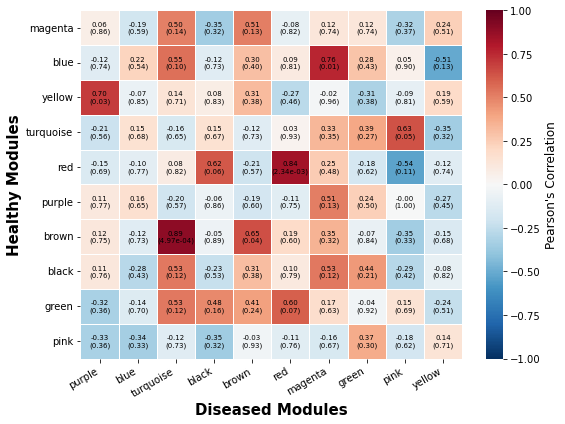

In [27]:
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

module_path = ""
def annotate_significance(pval):
        if pval < 0.001:
            return '***'
        elif pval < 0.01:
            return '**'
        elif pval < 0.05:
            return '*'
        else:
            return ''

pval_matrix = pd.read_csv(f"synthetic_0.1-corrMat-serial-pval.csv",index_col=0)
correlation_matrix = pd.read_csv(f"synthetic_0.1-corrMat-serial-corr.csv",index_col=0)
# Create annotation matrix
# Function to format p-values: scientific notation if < 0.01, otherwise 2 decimal places
def format_pval(p):
    return f"{p:.2e}" if p < 0.01 else f"{p:.2f}"

# Create annotation matrix with correlation and formatted p-value
annotation_matrix = np.array([
    [f"{correlation_matrix.values[i, j]:.2f}\n({format_pval(pval_matrix.values[i, j])})" for j in range(correlation_matrix.shape[1])]
    for i in range(correlation_matrix.shape[0])
])


# annotation_matrix = pval_matrix.applymap(annotate_significance)
# annotation_matrix

# Plot the heatmap
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(
    correlation_matrix,
    vmin=-1, vmax=1,  # Set color range for correlation
    cmap="RdBu_r",  # Custom Red-Blue colormap 
    annot=annotation_matrix,  # Annotate with significance
    annot_kws={"fontsize": 7, "color":"black"},
    fmt='',  # No formatting for annotations
    cbar_kws={'label': 'Correlation'},  # Add colorbar label
    linewidths=0.5  # Add lines between cells
)
# Access the colorbar and modify the label font size
cbar = heatmap.collections[0].colorbar
cbar.set_label("Pearson's Correlation", fontsize=12)  # Set font size of the colorbar label

# Improve label formatting
plt.xticks(rotation=30, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.title(f"", fontsize=14)
plt.xlabel("Diseased Modules", fontsize=15, fontweight="bold")
plt.ylabel("Healthy Modules", fontsize=15, fontweight="bold")

# Adjust layout for better spacing
plt.tight_layout()

# Save the plot
plt.savefig(f"synthetic_0.1-corrmat.png", dpi=300, bbox_inches='tight', facecolor="white")  # Save with high resolution and tight b

## 2. High variability (p=0.9)
Low overlap

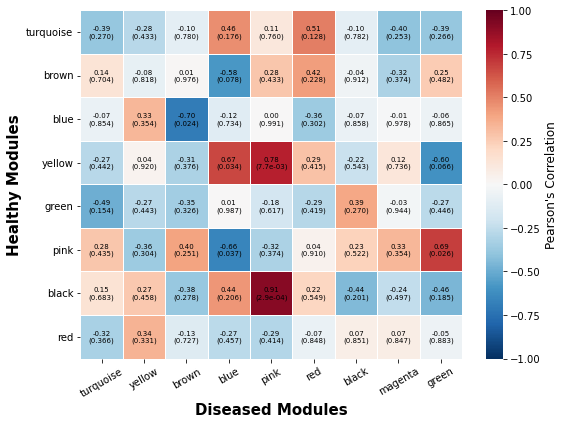

In [28]:
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd


module_path = "modules"
def annotate_significance(pval):
        if pval < 0.001:
            return '***'
        elif pval < 0.01:
            return '**'
        elif pval < 0.05:
            return '*'
        else:
            return ''

pval_matrix = pd.read_csv(f"synthetic_0.9-corrMat-serial-pval.csv",index_col=0)
correlation_matrix = pd.read_csv(f"synthetic_0.9-corrMat-serial-corr.csv",index_col=0)
# Create annotation matrix
def format_pval(p):
    return f"{p:.1e}" if p < 0.01 else f"{p:.3f}"

# Create annotation matrix with correlation and formatted p-value
annotation_matrix = np.array([
    [f"{correlation_matrix.values[i, j]:.2f}\n({format_pval(pval_matrix.values[i, j])})" for j in range(correlation_matrix.shape[1])]
    for i in range(correlation_matrix.shape[0])
])

# annotation_matrix = pval_matrix.applymap(annotate_significance)

# Plot the heatmap
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(
    correlation_matrix,
    vmin=-1, vmax=1,  # Set color range for correlation
    cmap="RdBu_r",  # Custom Red-Blue colormap 
    annot=annotation_matrix,  # Annotate with significance
    annot_kws={"fontsize": 7, "color":"black"},
    fmt='',  # No formatting for annotations
    cbar_kws={'label': 'Correlation'},  # Add colorbar label
    linewidths=0.5  # Add lines between cells
)
# Access the colorbar and modify the label font size
cbar = heatmap.collections[0].colorbar
cbar.set_label("Pearson's Correlation", fontsize=12)  # Set font size of the colorbar label

# Improve label formatting
plt.xticks(rotation=30, fontsize=10)
plt.yticks(rotation=0,fontsize=10)
plt.title(f"", fontsize=14)
plt.xlabel("Diseased Modules", fontsize=15, fontweight="bold")
plt.ylabel("Healthy Modules", fontsize=15, fontweight="bold")

# Adjust layout for better spacing
plt.tight_layout()

# Save the plot
plt.savefig(f"synthetic_0.9-corrmat.png", dpi=300, bbox_inches='tight', facecolor="white")  # Save with high resolution and tight b